Steane code pipecleaning
=====================

1. Set up logical zero for Steane code based  on the parity matrix in the book by Nielsen MA, Chuang IL. Quantum Computation and Quantum Information, 10th Anniversary Edition. Cambridge University Press; 2016. p. 474

2. Perform a logical Hadamard (TBC)

3. Peform a logical CX to entangle the two logical qubits (TBC)

4. Set up ancilla based on the parity matrix

5. Reverse the set up

**This is part of a "pipe-cleaning" exercise for an MSc Masters project.  The aim is to check that there are no issues with setting up the Steane code on Quiskit.  Please note that a full evaluation has not yet been carried out.  There may be some undetected errors.  Please use at your own risk**

Import the necessary function modules, including the SteaneCodeLogicalQubit class.  The methods of this class are called in this notebook.

In [1]:
from qiskit import(
  QuantumCircuit,
  QuantumRegister,
  ClassicalRegister,
  execute,
  Aer)

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

from circuits import SteaneCodeLogicalQubit

Define constants so the process flow can be controlled from one place.

In [2]:
INITIALISE = True
SECOND_LOGICAL = False

FIRST_LOGICAL_X = False           #Apply logical X operation? 
SECOND_LOGICAL_X = False          #Apply logical X operation? 

FIRST_REVERSE = True              #Reverse the first logical qubit
SECOND_REVERSE = False            #Reverse the first logical qubit

FIRST_HADAMARD = False            #Hadamard on first logical qbit
SECOND_HADAMARD = False           #Hadamard on second logical qbit

LOGICAL_CX = False                #Logical CX

ANCILLAS = True                   #Ancillas are active?
CORRECT_ERROR = True              #Correct errors
TESTING = True                    #Test by applying and X or Z error to one of the qubits
TEST_X_QUBIT = 5                  #Qbit to set bit flip- Starts at zero.
TEST_Z_QUBIT = 0                  #Qbit to phase flip- Starts at zero.

NOISE = False                     #Test with noise
SHOTS = 1000                      #Number of shots to run    
MEASURE_NOISE = 0.0000001         #Measurement noise
GATE_NOISE = 0.0003               #Gate noise

SIMULATOR = Aer.get_backend('qasm_simulator')

We specify the parity check matrix, since this defines the Steane code.  It is validated before the logical qubit is initiated to check that it is orthogonal to the valid codewords.

In [3]:
parity_check_matrix = [[0,0,0,1,1,1,1],
                       [0,1,1,0,0,1,1],
                       [1,0,1,0,1,0,1]]

Create an instance of the logical qubit and use a method to initialise the logical qubits as a logical zero.  The parity check matrix above as an input.

In [4]:
qubit = SteaneCodeLogicalQubit(0, parity_check_matrix)
qubit.set_up_logical_zero()

If TESTING is active we test the ancilla with an X and Z error and check that the correct error syndrome is returned.

In [5]:
if TESTING:
    qubit.force_X_error(TEST_X_QUBIT)   #force X error for testing
  # qubit.force_Z_error(TEST_Z_QUBIT)   #force Z error for testing


Set up ancilla and make a logical measurement

In [6]:
if ANCILLAS:
    qubit.set_up_ancilla()

Correct errors found in ancilla

In [7]:
if CORRECT_ERROR:
    qubit.correct_errors()

Uncompute initialisation of logical qubit

In [8]:
if FIRST_REVERSE:
    qubit.decode()

Measure qubits

In [9]:
qubit.logical_measure()

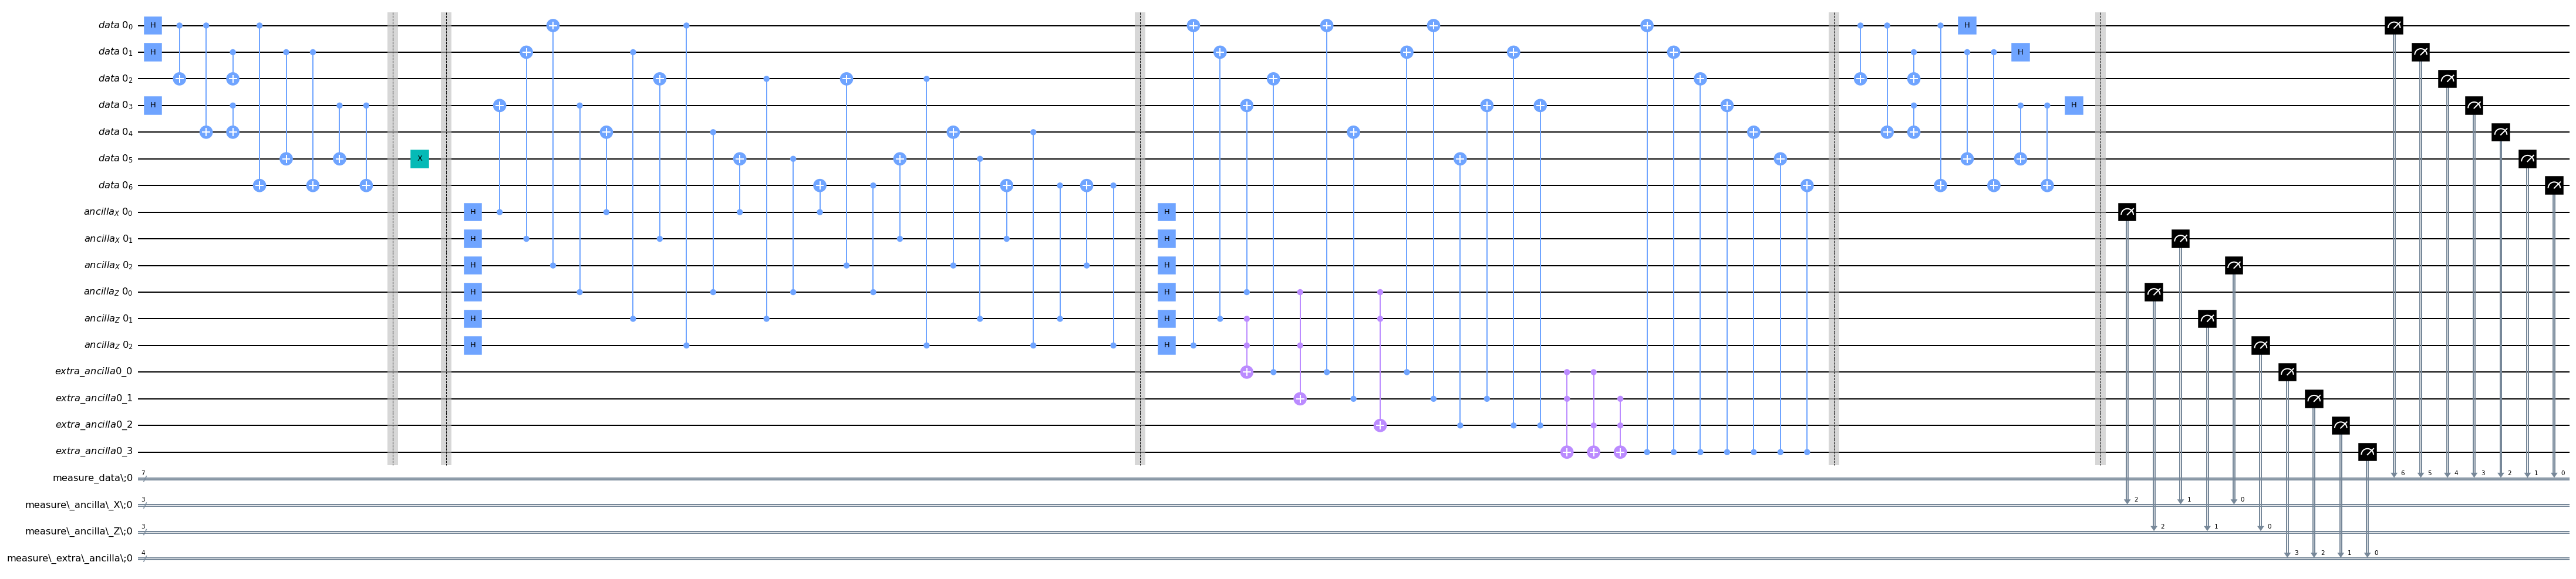

In [10]:
qubit.draw(output='mpl', filename = 'auto_qubit.jpg', fold=150)

Populate noise model

In [11]:
#Measurement noise
if NOISE:
    result = execute(qubit, SIMULATOR, noise_model=noise_model, shots=SHOTS).result()
else:
    result = execute(qubit, SIMULATOR, shots=SHOTS).result()

Execute results and print out.  The format is three bits for the Z error address, three bits for the X error address and seven bits for the Steane data bit. 

In [12]:
result = execute(qubit, SIMULATOR, shots=SHOTS).result()
counts = result.get_counts(qubit)
print ('The different states can be counted.  The simulated result are', counts)

The different states can be counted.  The simulated result are {'0010 110 000 0000000': 1000}
